# 2021/8/21
## 本代码绘制早晚年的偏差风场

In [1]:
import os
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import json
import sys
import time
import math
import xarray as xr
import copy
import pandas as pd
sys.path.append("/home/sun/mycode/module/")
from module_sun import *
from module_writenc import *
import metpy
import xarray as xr
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
from datetime import datetime
from geocat.viz import util as gvutil

In [2]:
file = xr.open_dataset("/home/sun/data/diff_wind_early_late.nc")
wind = file.isel(level=5,time=10)

In [9]:
fig1,ax = plt.subplots(1,1,figsize = (100,60))

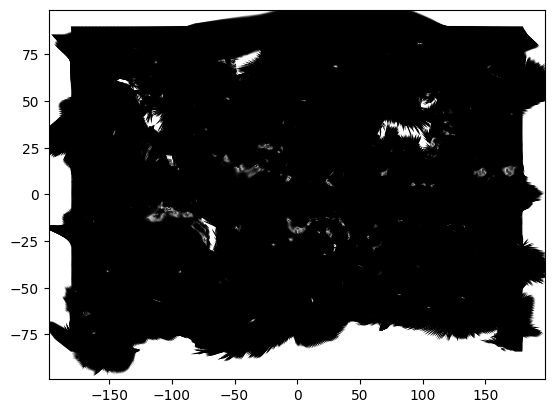

In [13]:
Q = plt.quiver(wind['lon'],wind['lat'],wind["diff_u"].data,wind["diff_v"].data, headwidth=1, scale = 100, headlength=4)

qk = ax.quiverkey(Q,
                  167.5,
                  72.5,
                  20,
                  r'20',
                  labelpos='N',
                  coordinates='data',
                  color='black',
                  zorder=2)


# Show the plot
plt.show()


In [81]:
wind.diff_u

<xarray.DataArray 'diff_u' (lat: 361, lon: 576)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [2.21343 , 2.174938, 2.135958, ..., 2.328456, 2.290239, 2.251889],
       [1.93529 , 1.89606 , 1.857055, ..., 2.051905, 2.013069, 1.974135],
       [1.133212, 1.090784, 1.048182, ..., 1.260034, 1.217794, 1.175633]])
Coordinates:
  * lon      (lon) float32 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    time     datetime64[ns] 1980-01-11
    level    float64 875.0
Attributes:
    longname:     uwind
    units:        m s-1
    valid_range:  [-1.e+15  1.e+15]

In [82]:
file

<xarray.Dataset>
Dimensions:  (time: 61, level: 42, lat: 361, lon: 576)
Coordinates:
  * lon      (lon) float32 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-03-01
  * level    (level) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.5 0.4 0.3 0.1
Data variables:
    diff_u   (time, level, lat, lon) float64 ...
    diff_v   (time, level, lat, lon) float64 ...